Professor Scheffler

Rita Kurban

## 1. Call Center Data

Using exponential likelihood with gamma prior, estimate the number of calls per minute for the 11th hour of the call center data set.

In [141]:
# Import all the packages
import pystan
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [142]:
# Loading the data
waiting_times_day = 
    np.loadtxt('/Users/ritakurban/Downloads/call-center.csv')

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
# Make 24 empty lists, one per hour
waiting_times_per_hour = [[] for _ in range(24)]  
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
# Data only for hour 11
eleventh_hour = waiting_times_per_hour[11]

In [144]:
# Data for stan
eleventh_hour_data = {
        'alpha': 1,  # fixed prior hyperparameters for the
        'beta': 0.25,   # gamma distribution
        'waiting_times': eleventh_hour,
        'N': len(eleventh_hour)}


In [145]:
# First Model
stan_code = """

data {  
    int < lower = 1 > N; // Number of observations
    vector[N] waiting_times; // Data
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

parameters {
    real<lower=0> lambda;
}

model {
    lambda ~ gamma(alpha, beta); // gamma prior
    waiting_times ~ exponential(lambda);  // likelihood function
    }

"""

In [146]:
# Compiling a Stan model 
stan = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_94a4d1669450c60ec2eb8ffd182eca75 NOW.


In [147]:
# Fit the model to the data. 
results = stan.sampling(data=eleventh_hour_data)
results

Inference for Stan model: anon_model_94a4d1669450c60ec2eb8ffd182eca75.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda  14.86    0.01    0.5  13.89  14.53  14.85  15.19  15.85 1567.0    1.0
lp__   1516.4    0.02   0.76 1514.3 1516.3 1516.7 1516.8 1516.9 1883.0    1.0

Samples were drawn using NUTS at Fri Oct 19 19:27:03 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

Posterior 95% confidence interval for lambda: [13.89538099 15.84256608]


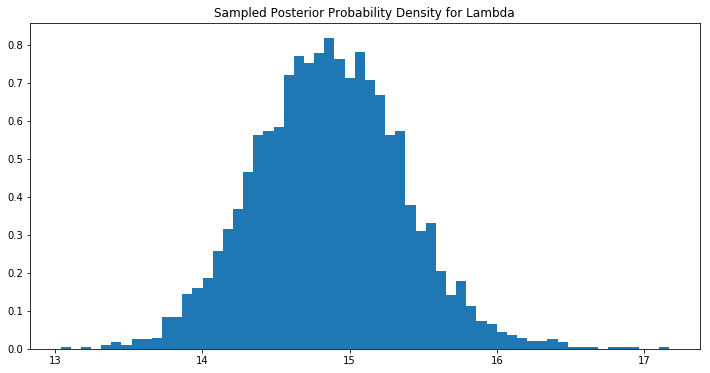

In [151]:
posterior_samples = results.extract()
plt.figure(figsize=(12, 6))
plt.hist(posterior_samples['lambda'], bins=60, density=True)
plt.title('Sampled Posterior Probability Density for Lambda')
print"Posterior 95% confidence interval for lambda:", np.percentile(posterior_samples['lambda'], [2.5, 97.5])
plt.show()

## 2. Normal Likelihood with Normal-Inverse-Gamma Prior.

In [153]:
# Get data
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

In [154]:
# Data for stan
stan_data = {
        'mu_0': 0,  # fixed prior hyperparameters for the
        'nu_0': 0.054,   # gamma distribution
        'alpha': 1.12, 
        'beta': 0.4,   
        'mydata': data,
        'N': len(data)}

In [155]:
# Second Model
stan_code2 = """

data {  
    int < lower = 1 > N; // Number of Observations
    vector[N] mydata; // Data
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
    real mu_0;  // fixed prior hyperparameter
    real<lower=0> nu_0; // fixed prior hyperparameter
    
}

parameters {
    real mu_post;
    real<lower=0> sigma2;
}

model {
   sigma2 ~ inv_gamma(alpha,beta); // distribution of sigma2
   mu_post ~ normal(mu_0,sigma2/nu_0); // distribution of mu
   mydata ~ normal(mu_post,sqrt(sigma2));  // likelihood function
}

"""

In [156]:
# Compiling a stan model
stan = pystan.StanModel(model_code=stan_code2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_744173eeb11e688c3dac39b9e75a6b0c NOW.


In [166]:
# fit the model to the data
stan_results = stan_model.sampling(data=stan_data)

In [167]:
stan_results
posterior_samples = stan_results.extract()
print"Posterior 95% confidence interval for mean:",
np.percentile(posterior_samples['mu_post'], [2.5, 97.5])
print"Posterior 95% confidence interval for variance:",
np.percentile(posterior_samples['sigma2'], [2.5, 97.5])

Posterior 95% confidence interval for mean: [2.80054519 3.33427039]
Posterior 95% confidence interval for variance: [2.98321742 4.41790682]


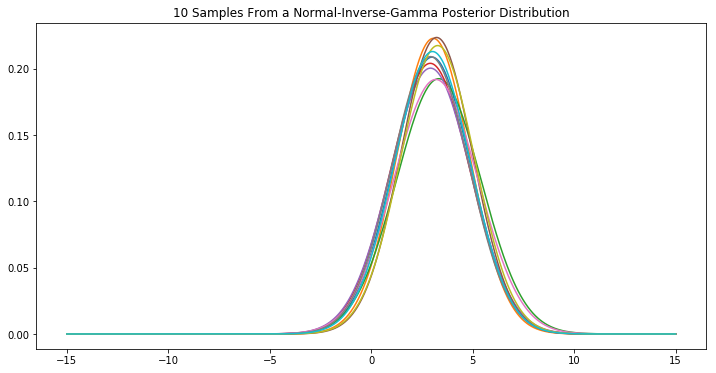

In [159]:
# Generate 10 samples from the posterior
num_samples = 10

# Plot the normal distributions corresponding to the samples
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)
for i in range(num_samples):
    plot_y = stats.norm.pdf(plot_x, loc=posterior_samples['mu_post'][i], scale=np.sqrt(posterior_samples['sigma2'][i]))
    plt.plot(plot_x, plot_y)
plt.title('%i Samples From a Normal-Inverse-Gamma Posterior Distribution' % num_samples)
plt.show()

## 3. Log-normal HRTEM data

In [160]:
# Load data
hrtem = np.loadtxt('/Users/ritakurban/Downloads/hrtem.csv')
log_hrtem = np.log(hrtem)

In [161]:
# Data for stan
log_data = {
        'mu_0': 2.3,  # fixed prior hyperparameters for the
        'nu_0': 0.1,   # gamma distribution
        'alpha': 2, 
        'beta': 5,   
        'mydata': log_hrtem,
        'N': len(log_hrtem)}


In [168]:
# Since the model doesn't differ from the previous taks,
# I reuse it with new data
stan_results = stan_model.sampling(data=log_data)

In [169]:
# Confidence interval
posterior_samples = stan_results.extract()
print"Posterior 95% confidence interval for mean:", np.percentile(posterior_samples['mu_post'], [2.5, 97.5])
print"Posterior 95% confidence interval for variance:", np.percentile(posterior_samples['sigma2'], [2.5, 97.5])

Posterior 95% confidence interval for mean: [1.8308457 1.9534209]
Posterior 95% confidence interval for variance: [0.43811322 0.55865101]


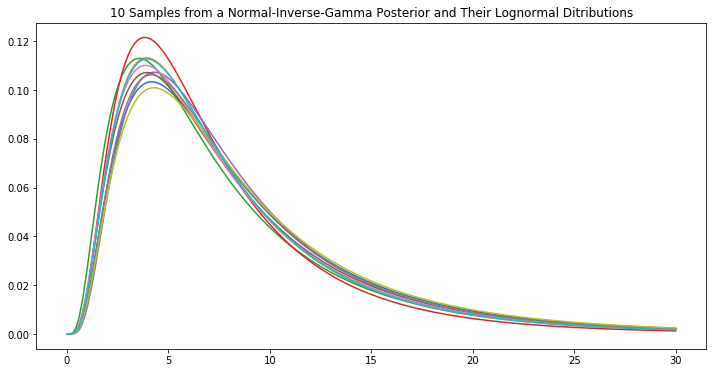

In [164]:
# Generate 10 samples from the posterior
num_samples = 10

# Plot the lognormal distributions corresponding to the samples
plt.figure(figsize=(12,6))
plot_x = np.linspace(0, 30, 200)
for i in range(num_samples):
    plot_y = stats.lognorm.pdf(plot_x,np.sqrt(posterior_samples['sigma2'][i]),scale=np.exp(posterior_samples['mu_post'][i]))
    plt.plot(plot_x, plot_y)
plt.title('%i Samples from a Normal-Inverse-Gamma Posterior and Their Lognormal Ditributions' % num_samples)
plt.show()